In [1]:
from cdt.causality.graph import GES
import pickle
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

Detecting 1 CUDA devices.


In [2]:
with open('data/data_fill.pkl','rb') as f:
    data_fill_list = pickle.load(f)

    

In [3]:
ges = GES()
DAGs_list = []
for data_fill in tqdm_notebook(data_fill_list):
    dag = ges.create_graph_from_data(data_fill)
    dag_mat =np.array(nx.adjacency_matrix(dag).todense())
    DAGs_list.append(dag_mat)

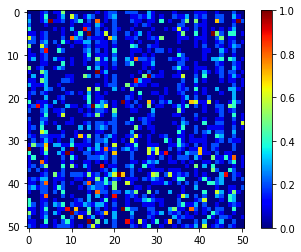

In [4]:
freqs = np.array(DAGs_list).mean(0)
plt.imshow(freqs,cmap='jet')
plt.colorbar()

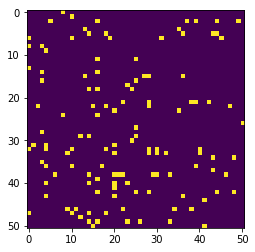

In [5]:
dag_tot = (freqs>=.5).astype(int)
plt.imshow(dag_tot)

In [6]:
DAG_GES = pd.DataFrame(dag_tot, index = data_fill_list[0].columns, columns=data_fill_list[0].columns)
DAG_GES.to_csv('data/DAG_GES.csv')